<a href="https://colab.research.google.com/github/Jlok17/2022MSDS/blob/main/Story_7_Data_608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Story - 7 : Where Do Strategic Minerals Come From?
The US Geological Survey publishes a list of Strategic Minerals ( https://www.usgs.gov/news/national-news-release/us-geological-survey-releases-2022-list-critical-minerals ). Having a secure supply of these minerals is essential to our security and economic prosperity. However many of these minerals are sourced from outside of the US. This assignment is to develop a reference catalog of the source or sources of each of these minerals and a judgement on the reliability of each source under stressed circumstance (e.g. war, economic crisis, etc.)


Notes:
You will need to identify a source or sources for each of the minerals in the 2022 List of Critical Minerals

You will need to categorize each source country as an ally, a competitor or a neutral party.

You will need to develop data visualizations that tell the story of source dependency and shortfall impact.

This assignment is due at the end of week fourteen of the semester

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/Data608/elements_data.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Element   50 non-null     object 
 1   source_1  40 non-null     object 
 2   s1_prop   40 non-null     float64
 3   s1_type   40 non-null     object 
 4   source_2  40 non-null     object 
 5   s2_prop   40 non-null     float64
 6   s2_type   40 non-null     object 
 7   source_3  40 non-null     object 
 8   s3_prop   40 non-null     float64
 9   s3_type   40 non-null     object 
 10  source_4  39 non-null     object 
 11  s4_prop   39 non-null     float64
 12  s4_type   39 non-null     object 
 13  source_5  38 non-null     object 
 14  s5_prop   38 non-null     float64
 15  s5_type   38 non-null     object 
dtypes: float64(5), object(11)
memory usage: 6.4+ KB


In [46]:
# Filter out rows where all source columns are NaN
df_filtered = df[~df[['source_1', 'source_2', 'source_3', 'source_4', 'source_5']].isna().all(axis=1)]

# Prepare a new DataFrame to aggregate the data
Element_data = {
    'Element': [],
    'Ally': [],
    'Competitor': [],
    'Neutral': []
}

# Element Data Creation
for index, row in df_filtered.iterrows():
    ally_sum = 0
    competitor_sum = 0
    neutral_sum = 0

    for i in range(1, 6):
        if pd.notna(row[f's{i}_prop']):
            if row[f's{i}_type'] == 'Ally':
                ally_sum += row[f's{i}_prop']
            elif row[f's{i}_type'] == 'Competitor':
                competitor_sum += row[f's{i}_prop']
            elif row[f's{i}_type'] == 'Neutral':
                neutral_sum += row[f's{i}_prop']

    Element_data['Element'].append(row['Element'])
    Element_data['Ally'].append(ally_sum)
    Element_data['Competitor'].append(competitor_sum)
    Element_data['Neutral'].append(neutral_sum)


Element_data_df = pd.DataFrame(Element_data)
Element_data_df.set_index('Element', inplace=True)



elements_no_sources = df[df[['source_1', 'source_2', 'source_3', 'source_4', 'source_5']].isna().all(axis=1)]
elements_list = elements_no_sources['Element'].tolist()

print("Elements with no country inputs:", elements_list)

Elements with no country inputs: ['Cesium**', 'Iridium**', 'Rhodium**', 'Rubidium**', 'Ruthenium**', 'Samarium**', 'Scandium**', 'Terbium**', 'Thulium**', 'Ytterbium**']


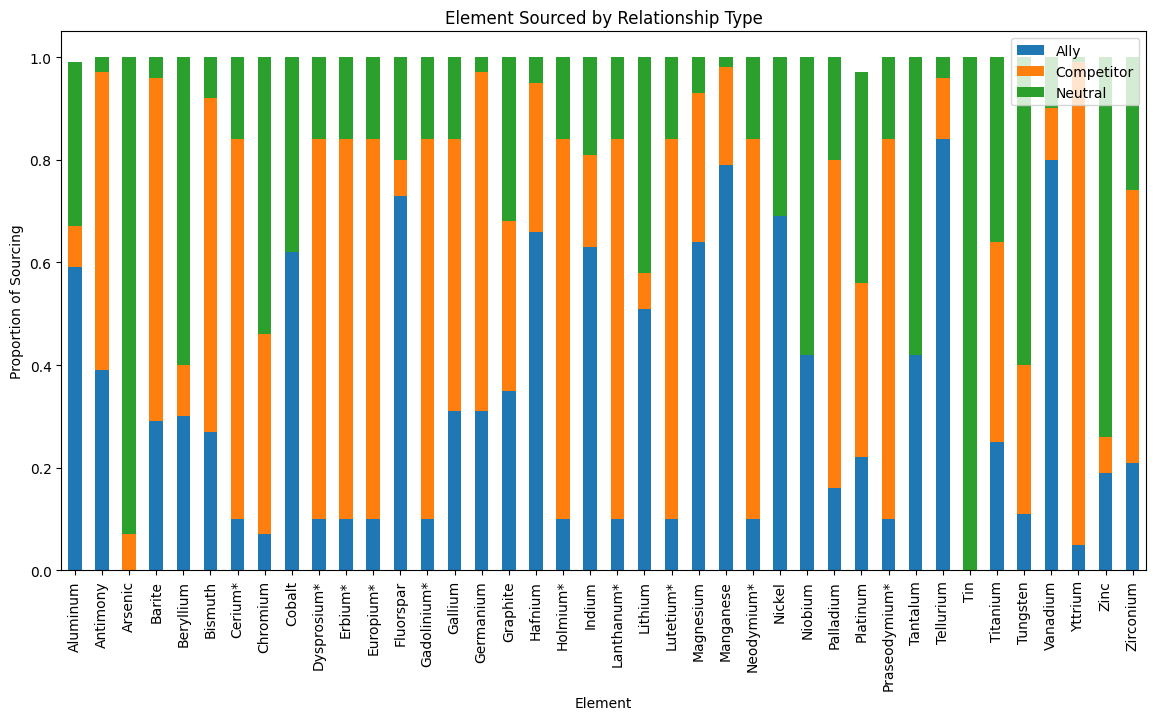

In [47]:
# Bar Chart
ax = Element_data_df.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Element Sourced by Relationship Type')
plt.xlabel('Element')
plt.ylabel('Proportion of Sourcing')
ax.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.show()


# Dominant Category
Element_data_df['Dominant'] = Element_data_df[['Ally', 'Competitor', 'Neutral']].idxmax(axis=1)

# Separate Category
ally_dominant_df = Element_data_df[Element_data_df['Dominant'] == 'Ally']
competitor_dominant_df = Element_data_df[Element_data_df['Dominant'] == 'Competitor']
neutral_dominant_df = Element_data_df[Element_data_df['Dominant'] == 'Neutral']

# Plot Function
def plot_category(df, title):
    ax = df[['Ally', 'Competitor', 'Neutral']].plot(kind='bar', stacked=True, figsize=(14, 7))
    plt.title(title)
    plt.xlabel('Element')
    plt.ylabel('Proportion of Sourcing')
    ax.legend(loc='upper right', bbox_to_anchor=(1,1))
    plt.show()

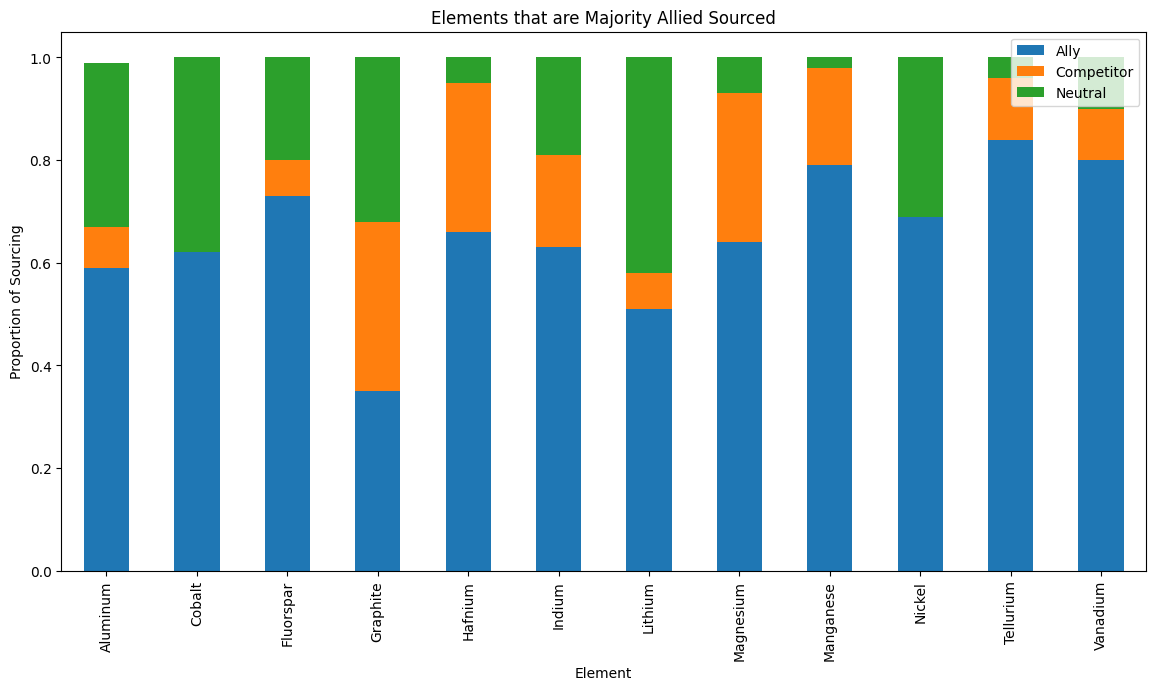

In [48]:
plot_category(ally_dominant_df, 'Elements that are Majority Allied Sourced')

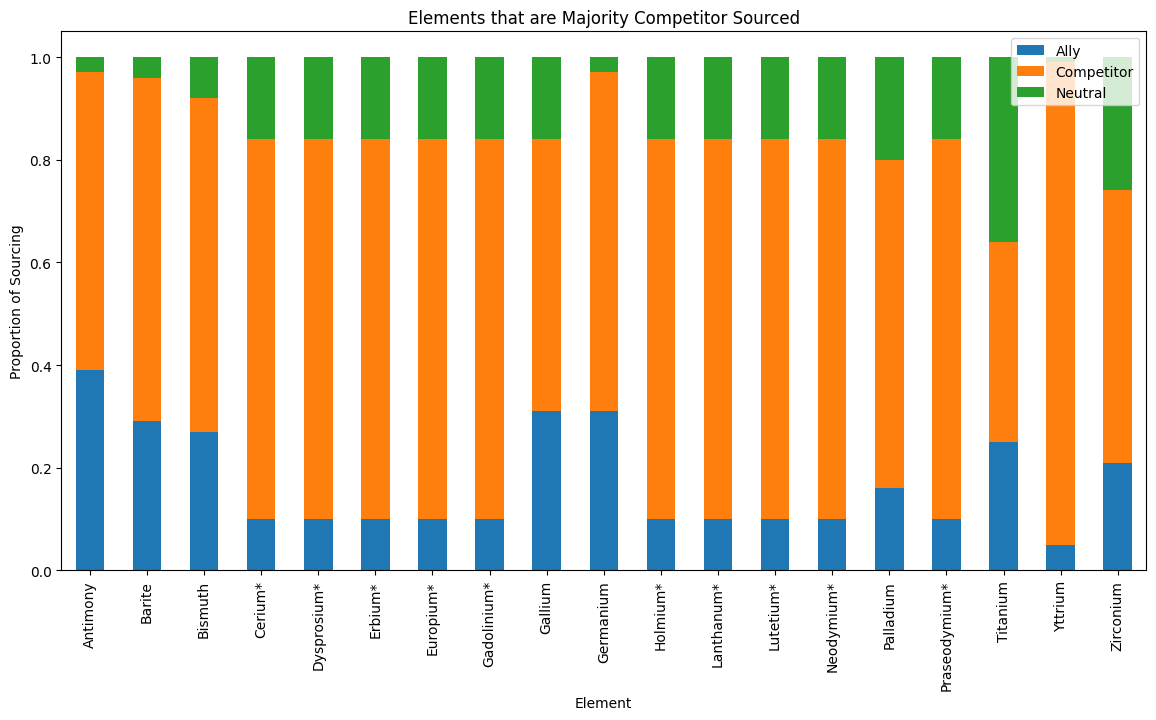

In [49]:
plot_category(competitor_dominant_df, 'Elements that are Majority Competitor Sourced')

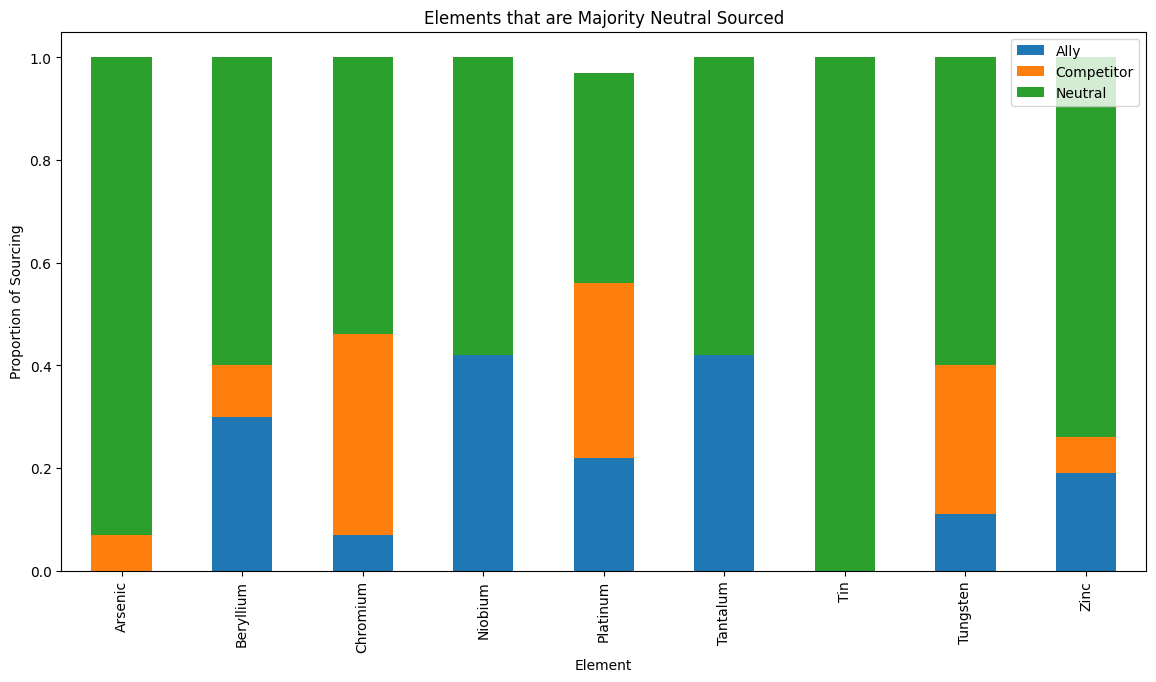

In [50]:
plot_category(neutral_dominant_df, 'Elements that are Majority Neutral Sourced')

In [51]:
# Calculating Number of Elements by Country
source_columns = ['source_1', 'source_2', 'source_3', 'source_4', 'source_5']

counts = pd.Series(dtype=int)
for column in source_columns:
    counts = counts.add(df[column].value_counts(), fill_value=0)
counts = counts.astype(int)
counts_sorted = counts.sort_values(ascending=False)
counts_sorted.info()

<class 'pandas.core.series.Series'>
Index: 42 entries, other to Latvia
Series name: None
Non-Null Count  Dtype
--------------  -----
42 non-null     int64
dtypes: int64(1)
memory usage: 672.0+ bytes


other          39
China          25
Japan          15
Malaysia       12
Canada         11
Estonia        10
Germany         9
Russia          9
S. Africa       7
Australia       6
Mexico          5
S. Korea        3
Belgium         3
Italy           3
Congo           2
Rawanda         2
Peru            2
Norway          2
Mozambique      2
Madagascar      2
Kazakhstan      2
Bolivia         2
India           2
Vietnam         2
France          2
Finland         2
Ukraine         1
Switzerland     1
Senegal         1
Turkey          1
U.A.E.          1
Taiwan          1
Argentina       1
Philippines     1
Morocco         1
Israel          1
Indonesia       1
Hungary         1
Gabon           1
Chile           1
Brazil          1
Latvia          1
dtype: int64

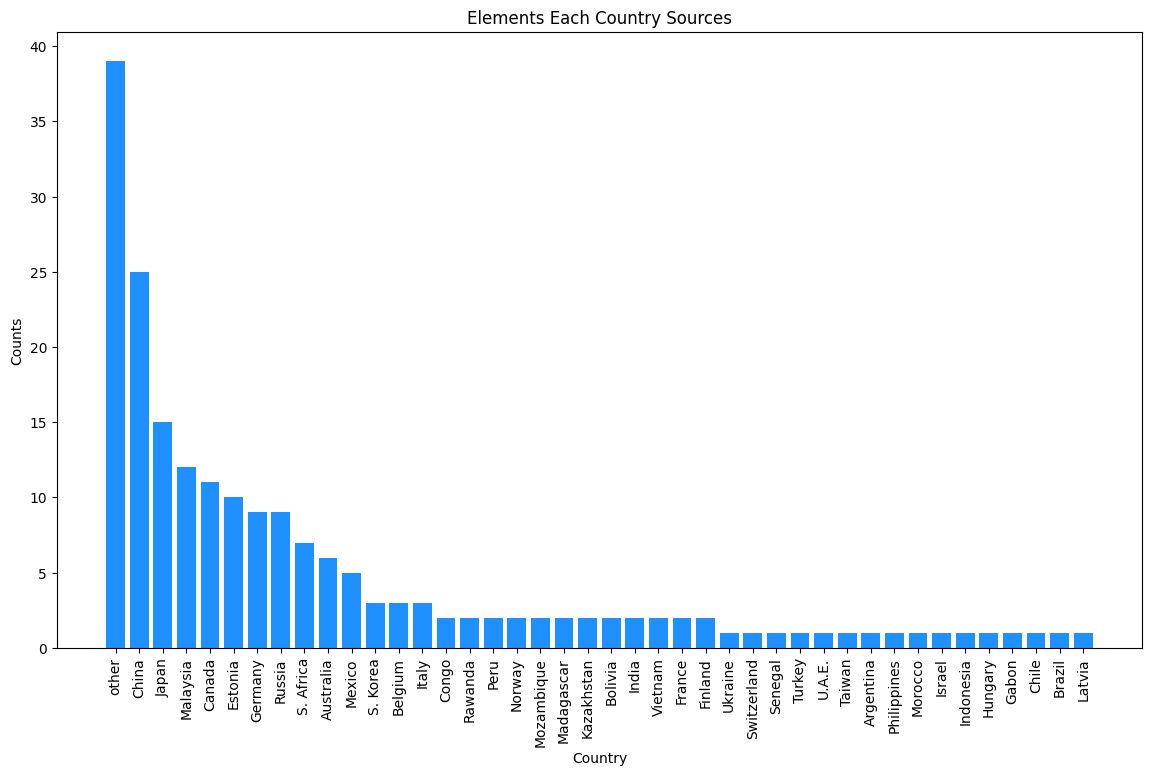

In [52]:
plt.figure(figsize=(14, 8))
plt.bar(counts_sorted.index, counts_sorted.values, color='dodgerblue')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.title('Elements Each Country Sources')
plt.xticks(rotation=90)
plt.show()